# TOM FORD Twitter Analysis

## Background Information and Disclaimer 

The fashion industry changes season to season. A collection can be designed, but the customer should always be the priority. More importantly, what are they saying? What do they think of the new collection? How likely are they to buy an item? What item(s) generated the most "buzz" in the overall collection? All questions a fashion house would want answers to.

This notebook walks through a personal project of interest: what are people talking about in relation to the brand TOM FORD?

For this project, it felt appropriate to analyze data from Twitter. Data is provided by the users, and the data itself is always recent. This is because Twitter only indexes 7 days worth of data when using a Twitter application.

The hashtag that was analyzed is "#tomford". The final product is a word cloud and data set, showing what users are "tweeting" when referencing the hashtag.

For creating your own word cloud, reference the tutorial [A Simple Twitter Data Mining Trip](http://rpubs.com/Antreas93/219057), by Antreas Antoniou.

**Disclaimer: Please note that I am not employed by Tom Ford International. This was a project of personal interest.**

## Load Packages 

In [1]:
library(base64enc)
library(devtools)
library(httr)
library(stringr)
library(RColorBrewer)
library(tm)
library(twitteR)
library(wordcloud)

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:httr’:

    content



## Software Requirements 

1. R 3.2.5 or greater
2. RStudio 1.0.4 or greater

## Twitter Authentication

In order to access tweets, you'll need to create a Twitter app [here](https://apps.twitter.com/). Using ```setup_twitter_oauth``` will require a consumer key, consumer secret key, access token, and access secret token.

In [3]:
auth <- setup_twitter_oauth(# Consumer Key,
                            # Consumer Secret Key,
                            # Access Token,
                            # Access Secret Token
  )

[1] "Using direct authentication"


## Request Tweets

You now have the ability to request tweets. Be advised you can only request 5000 tweets per hour.
Additionally, you can only request tweets within a period up to 7 days in the past.

In [4]:
tf <- searchTwitter("#tomford",
                    n = 2500, # Request up to 2500 tweets per hour
                    lang = "en"
)

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
“2500 tweets were requested but the API can only return 2407”

## Remove Specific Characters 

After requesting the tweets, they all must be prepped for the wordcloud. The code below removes characters other than letters.

In [5]:
tfText <- sapply(tf, function(x) x$getText())
tfText <- gsub("(f|ht)tp(s?)://(.*)[.][a-z]+", "", tfText)
tfText <- gsub("(f|ht)tps(s?)://(.*)[.][a-z]+", "", tfText)
tfText <- gsub("https","",tfText)
tfText <- str_replace_all(tfText,"[^a-zA-Z\\s]", " ")

## Create Corpus 

This block of code creates the corpus, and a term document matrix.

The words 'tomford', 'tom', and 'ford' are removed. We are already searching for these words, and they appear very often in relevant tweets. This is redundant; because of this, they're removed.

In [13]:
tfCorpus <- Corpus(VectorSource(tfText))
tfCorpus <- tm_map(tfCorpus,PlainTextDocument)
tdm <- TermDocumentMatrix(
        tfCorpus,
        control = list(
        stopwords = c("tomford", 'tom', 'ford',
            stopwords("english")))
)

## Word Frequency 

The penultimate step is to create a matrix of the words, sorted by how often they occur. This is then converted into a data frame.

In [14]:
m <- as.matrix(tdm)
wordFrequency <- sort(rowSums(m), decreasing = TRUE)
wordFrequency <- wordFrequency
words <- data.frame(word = names(wordFrequency), frequency = wordFrequency)

To view the top 10 words most used in tweets, you can run the command below.

In [15]:
topWords <- words[1:10,]
topWords

,word,frequency
auction,auction,1804
sunglasses,sunglasses,764
new,new,595
black,black,462
nwt,nwt,263
brown,brown,262
men,men,236
silk,silk,233
tie,tie,198
authentic,authentic,189


## Create The Wordcloud 

Finally, the wordcloud is created.

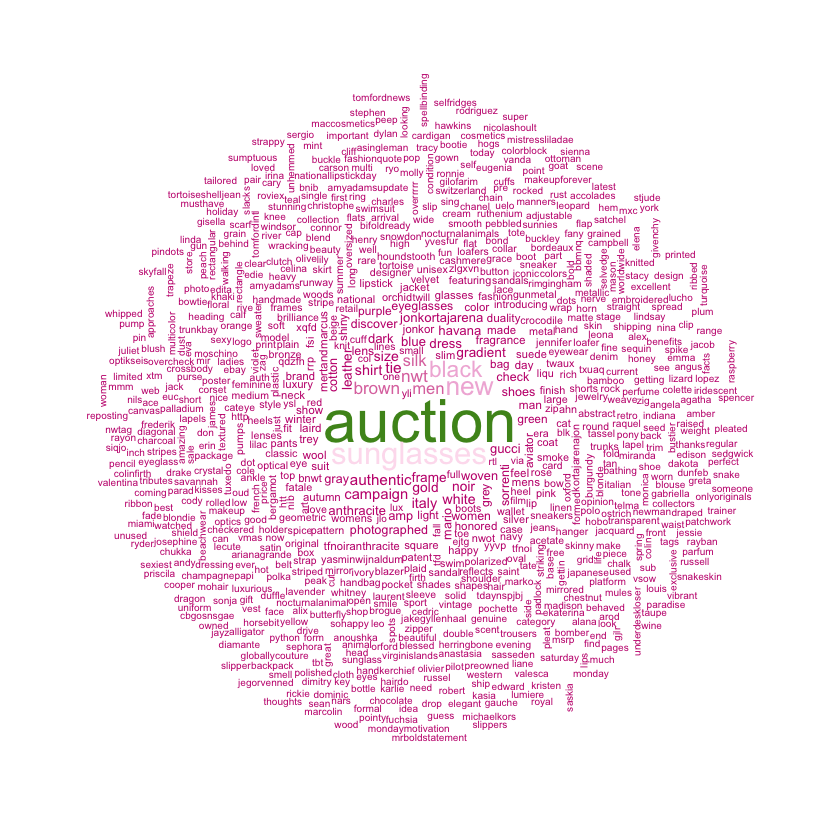

In [16]:
tfWordcloud <- wordcloud(words$word, words$freq, random.order = FALSE,scale=c(3,0.5),
                         colors = brewer.pal(8, "PiYG"))

## Post Analysis Thoughts 

1. Since Twitter only allows you to pull data up to one week in the past, you'll want to perform analysis of interest sooner than later. As Twitter mentions: "Our search service is not meant to be an exhaustive archive of public tweets and not all tweets are indexed or returned."

2. Within the word cloud, what's noticeable is the most used word after "tom" and "ford" is "auction". Compared to the top 10 words, "auction" is the outlier. Why "auction" is mentioned so frequently would require deeper analysis of the tweets, along with the context of the word "auction".

3. (From October 2016) Since the size of the word relates to frequency of occurence, something noticeable in the word cloud is the word "nocturnalanimals" (just below "auction"). While this may look out of place, this is in reference to the film "Nocturnal Animals", which Ford directed. At the time of this project, the film is set to debut on November 23, 2016. This suggests people are talking about the film on Twitter, and using the hashtag "#tomford" when tweeting about the film itself.

## Recommendations 

1. Exploring the context of words would be another task to perform. Other than the word "auction", the other words are relevant to the brand. Tom Ford designs dark clothing often, which explains why "brown" and "black" appear frequently. The word "leather" could be in reference to leather clothing, or the fragrance Tuscan Leather. Finally, "sunglasses" could also be researched in more detail. Are users talking about men's sunglasses, women's sunglasses, a certain model, etc.?

2. More analysis during fashion shows would be very applicable. On September 7, 2016, Tom Ford released his Autumn/ Winter 2016 collection; by September 8, 2016, the hashtags "#tomford" and "#TFAW16" were trending on Twitter. Because of this, it would be advisable to request tweets using both hashtags, and see what people are tweeting about in the days leading up the fashion show, and after the collection has been released.



## Closing Thoughts 

As someone who became a fan of Tom Ford years ago, this was a project I'd wanted to do for a while. Upon examining the results, it's interesting to now view what Twitter users talk about with respect to Tom Ford. A more detailed analysis may be conducted in a future project. For the time being, this project serves as an example to fashion houses (and other businesses), and shows that the analysis conducted in this project can help a business gauge what users/ consumers are talking about, which in turn can assist businesses with relevant business decisions.